# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Topaz Montague - [Project Repository Link](https://github.com/tfmontague/article-summarizer)

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

###### Response to Question 1:

In [25]:
import requests
from bs4 import BeautifulSoup
import os

# Define the URL of the webpage
url = 'https://www.thinkful.com/blog/navigating-a-career-change-into-data-science-a-step-by-step-guide/'

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find the div element that contains the article
    article_div = soup.find('div', class_="text")
    
    if article_div:
        # Create the data directory if it does not exist
        if not os.path.exists('data'):
            os.makedirs('data')
        
        # Define the path to the output HTML file
        output_file_path = os.path.join('data', 'article.html')
        
        # Write the article HTML to the file
        with open(output_file_path, 'w', encoding='utf-8') as file:
            file.write(str(article_div))
        print(f"Article saved to {output_file_path}")
    else:
        print("Article content not found.")
else:
    print(f"Failed to retrieve webpage: Status code {response.status_code}")


Article saved to data\article.html


2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

My article is [Navigating a Career Change into Data Science: A Step-by-Step Guide](https://www.thinkful.com/blog/navigating-a-career-change-into-data-science-a-step-by-step-guide/). I chose to explore this because I'd like to get an understanding of the overall sentiment of those that have pivoted their careers into Data Analysis or Science, as I am planning to make the change in my career soon.

###### Response to Question 2:

In [26]:
import os
from bs4 import BeautifulSoup
from textblob import TextBlob

# Load the article HTML from the file
file_path = os.path.join('data', 'article.html')
with open(file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML to extract text
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

# Perform sentiment analysis
blob = TextBlob(article_text)
sentiment = blob.sentiment.polarity  # Gives a measure of the sentiment

# Print the polarity score
print(f"Sentiment Polarity Score: {sentiment}")

# Count the number of sentences by splitting on sentence terminators
sentences = [sent.strip() for sent in article_text.replace('?', '.').replace('!', '.').split('.') if sent.strip()]
print(f"Number of sentences in the article: {len(sentences)}")


Sentiment Polarity Score: 0.151489898989899
Number of sentences in the article: 58


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

###### Response to Question 3:

In [31]:
import os
from bs4 import BeautifulSoup
import spacy
from collections import Counter
from tabulate import tabulate

# Load spaCy's English-language model
nlp = spacy.load('en_core_web_sm')

# Load the article HTML from the file
file_path = os.path.join('data', 'article.html')
with open(file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML to extract text
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

# Process the text with spaCy
doc = nlp(article_text)

# Tokenize and count words, filtering for nouns, adjectives, and verbs
words = [token.text.lower() for token in doc if token.is_alpha and token.pos_ in ['NOUN', 'ADJ', 'VERB']]
word_freq = Counter(words)

# Determine the 5 most frequent tokens
most_common_tokens = word_freq.most_common(5)

# Prepare data for printing the most common tokens and their frequencies
most_common_table = [["Token", "Frequency"]]
most_common_table.extend(most_common_tokens)

# Print the common tokens and their frequencies in a table with borders
print("Common Tokens and Their Frequencies:")
print(tabulate(most_common_table, headers="firstrow", tablefmt="grid"))

# Optionally, prepare data for all tokens and their frequencies
full_table = [["Token", "Frequency"]]
full_table.extend(word_freq.items())

# Print all tokens and their frequencies in a table with borders
print("\nAll Tokens and Their Frequencies:")
print(tabulate(full_table, headers="firstrow", tablefmt="grid"))


Common Tokens and Their Frequencies:
+---------+-------------+
| Token   |   Frequency |
+=========+=============+
| data    |          27 |
+---------+-------------+
| science |          25 |
+---------+-------------+
| career  |           8 |
+---------+-------------+
| skills  |           8 |
+---------+-------------+
| field   |           6 |
+---------+-------------+

All Tokens and Their Frequencies:
+--------------------+-------------+
| Token              |   Frequency |
+====================+=============+
| exciting           |           1 |
+--------------------+-------------+
| nerve              |           1 |
+--------------------+-------------+
| racking            |           1 |
+--------------------+-------------+
| embark             |           1 |
+--------------------+-------------+
| career             |           8 |
+--------------------+-------------+
| change             |           2 |
+--------------------+-------------+
| venturing          |           1 

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

###### Response to Question 4:

In [30]:
import spacy
from collections import Counter
import os
from bs4 import BeautifulSoup
from tabulate import tabulate

# Load the trained spaCy pipeline
nlp = spacy.load('en_core_web_sm')

# Define the path to the input HTML file
input_file_path = os.path.join('data', 'article.html')

# Read the HTML content from the file
with open(input_file_path, 'r', encoding='utf-8') as file:
    article_html = file.read()

# Use BeautifulSoup to extract text content from HTML
soup = BeautifulSoup(article_html, 'html.parser')
article_text = soup.get_text()

# Process the text with spaCy
doc = nlp(article_text)

# Extract lemmas and convert them to lower case
lemmas = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop]

# Count the frequency of each lemma
lemma_freq = Counter(lemmas)

# Get the 5 most common lemmas
most_common_lemmas = lemma_freq.most_common(5)

# Prepare data for the most common lemmas table
most_common_table = [["Lemma", "Frequency"]]
most_common_table.extend(most_common_lemmas)

# Prepare data for the full lemma frequency table
full_lemma_table = [["Lemma", "Frequency"]]
full_lemma_table.extend(sorted(lemma_freq.items()))

# Print the common lemmas with their frequencies in a table with borders
print("Most Common Lemmas:")
print(tabulate(most_common_table, headers="firstrow", tablefmt="grid"))

# Print all lemmas with their frequencies in a table with borders
print("\nAll Lemmas and Their Frequencies:")
print(tabulate(full_lemma_table, headers="firstrow", tablefmt="grid"))


Most Common Lemmas:
+---------+-------------+
| Lemma   |   Frequency |
+=========+=============+
| science |          26 |
+---------+-------------+
| datum   |          22 |
+---------+-------------+
| data    |          11 |
+---------+-------------+
| skill   |           9 |
+---------+-------------+
| career  |           8 |
+---------+-------------+

All Lemmas and Their Frequencies:
+-----------------------+-------------+
| Lemma                 |   Frequency |
+=======================+=============+
| ability               |           1 |
+-----------------------+-------------+
| abreast               |           1 |
+-----------------------+-------------+
| achievement           |           1 |
+-----------------------+-------------+
| acquire               |           2 |
+-----------------------+-------------+
| adapt                 |           1 |
+-----------------------+-------------+
| adaptdata             |           1 |
+-----------------------+-------------+
| age  

5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

###### Response to question 5, part 1:

In [33]:
import os
from bs4 import BeautifulSoup
import spacy
from tabulate import tabulate

# Load spaCy's English-language model
nlp = spacy.load('en_core_web_sm')

# Load the article HTML from the file
file_path = os.path.join('data', 'article.html')
with open(file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML to extract text
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

# Process the text with spaCy
doc = nlp(article_text)

# Create a list to hold sentence data and scores
sentence_scores = []

# Initialize a sentence counter
sentence_number = 1

# Tokenize into sentences and calculate score for each (score = number of tokens in the sentence)
for sent in doc.sents:
    num_tokens = len([token for token in sent if token.is_alpha])
    sentence_scores.append([sentence_number, num_tokens])
    sentence_number += 1  # Increment the sentence counter

# Prepare and print the table using tabulate
print(tabulate(sentence_scores, headers=["Sentence Number", "Token Count"], tablefmt="grid"))


+-------------------+---------------+
|   Sentence Number |   Token Count |
+===================+===============+
|                 1 |            25 |
+-------------------+---------------+
|                 2 |            18 |
+-------------------+---------------+
|                 3 |            25 |
+-------------------+---------------+
|                 4 |            19 |
+-------------------+---------------+
|                 5 |            11 |
+-------------------+---------------+
|                 6 |            42 |
+-------------------+---------------+
|                 7 |            12 |
+-------------------+---------------+
|                 8 |            18 |
+-------------------+---------------+
|                 9 |            17 |
+-------------------+---------------+
|                10 |            20 |
+-------------------+---------------+
|                11 |            36 |
+-------------------+---------------+
|                12 |            16 |
+-----------

###### Response to Question 5, part 2:

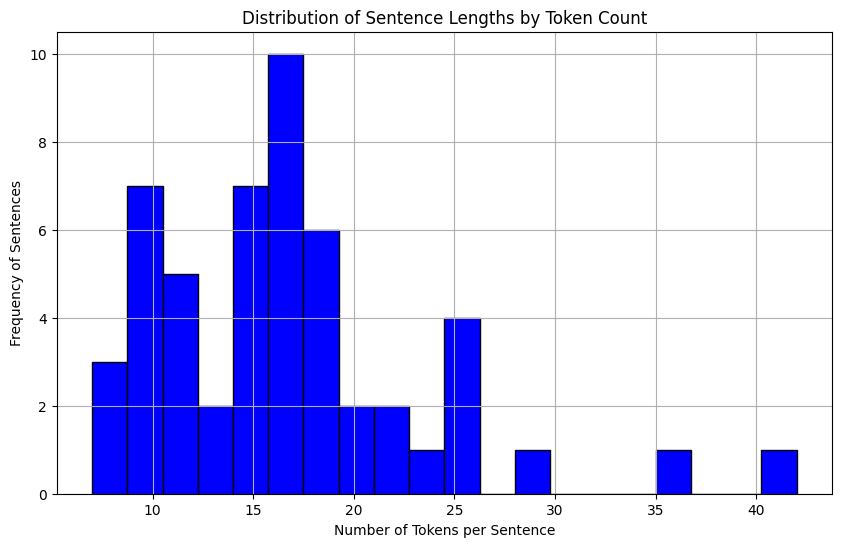

In [34]:
import os
from bs4 import BeautifulSoup
import spacy
from tabulate import tabulate
import matplotlib.pyplot as plt

# Load spaCy's English-language model
nlp = spacy.load('en_core_web_sm')

# Load the article HTML from the file
file_path = os.path.join('data', 'article.html')
with open(file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML to extract text
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

# Process the text with spaCy
doc = nlp(article_text)

# List to hold scores (number of tokens in each sentence)
token_counts = []

# Tokenize into sentences and calculate token count for each
for sent in doc.sents:
    num_tokens = len([token for token in sent if token.is_alpha])
    token_counts.append(num_tokens)

# Plotting the histogram of token counts
plt.figure(figsize=(10, 6))
plt.hist(token_counts, bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Sentence Lengths by Token Count')
plt.xlabel('Number of Tokens per Sentence')
plt.ylabel('Frequency of Sentences')
plt.grid(True)
plt.show()


6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?